In [115]:
#Loading the basic modules. 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#For images handling.
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#model & layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [116]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/csv.csv",nrows=1000)
df.head()

,photo_id,label
0,k_PSngRS22mSA1MypwrjPg,food
1,D_94KivwVgitkzFIgE_KcQ,food
2,Hf39P7_G_eRCqfVwvMDV6g,drink
3,agxl4sABeRXwjLL506KMrQ,food
4,7cZ0MREN2TwAAX4nnirQlA,food


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   photo_id  1000 non-null   object
 1   label     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [118]:
df['label'].value_counts()


label
food       560
inside     271
outside     93
drink       71
menu         5
Name: count, dtype: int64

In [119]:
df['photo_id'] = df['photo_id']+'.jpg'
df['image_path'] = 'C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/photos/'+df['photo_id']

In [120]:
import os

# Define the path to the directory
directory_path = 'C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/photos'

# Check if the directory exists and handle errors
try:
    if os.path.exists(directory_path):
        files_found = os.listdir(directory_path)
        print(f"Photos found in '{directory_path}': {len(files_found)} files")
    else:
        print(f"Error: Directory '{directory_path}' does not exist. Please check the path.")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")
except PermissionError as e:
    print(f"PermissionError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Photos found in 'C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/photos': 200098 files


In [121]:
filtered_df = df[df['photo_id'].isin(files_found)]

In [122]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   photo_id    1000 non-null   object
 1   label       1000 non-null   object
 2   image_path  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [123]:
filtered_df['label'].value_counts()

label
food       560
inside     271
outside     93
drink       71
menu         5
Name: count, dtype: int64

In [124]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image

def display_image(image_path):
    img = mpimg.imread(image_path)  # Read the image
    plt.figure(figsize=(6,6))  # Optional: adjust the size of the image
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Remove axes
    plt.show()  # Show the imagenum_classes = len(categories)

Displaying an image from the label: 'food' 


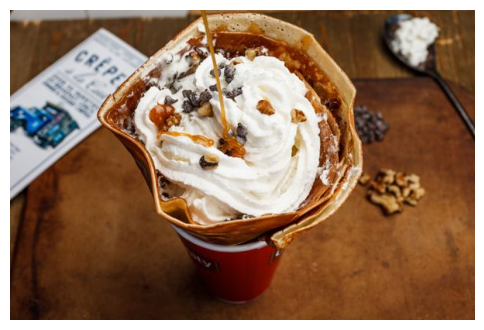

Displaying an image from the label: 'drink' 


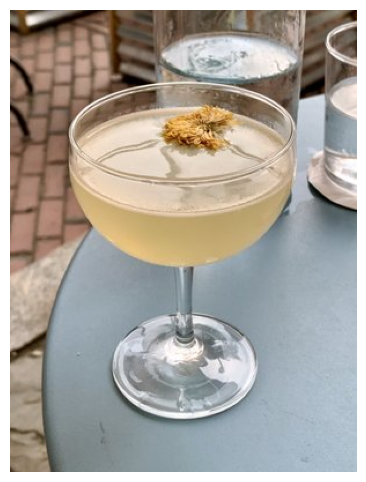

Displaying an image from the label: 'inside' 


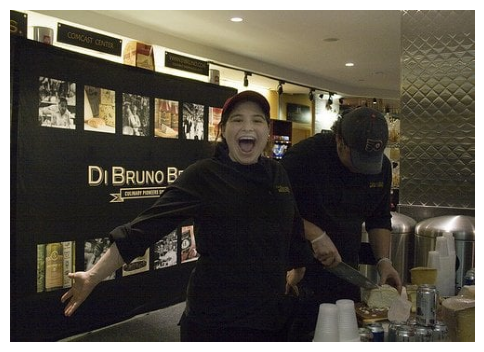

Displaying an image from the label: 'outside' 


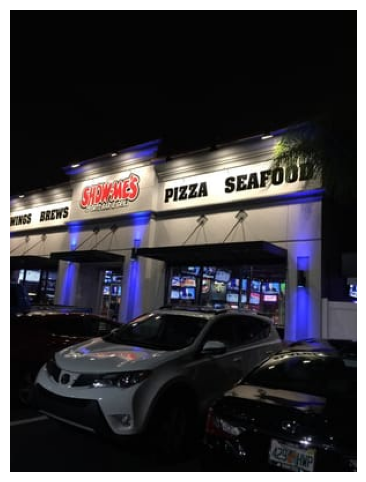

Displaying an image from the label: 'menu' 


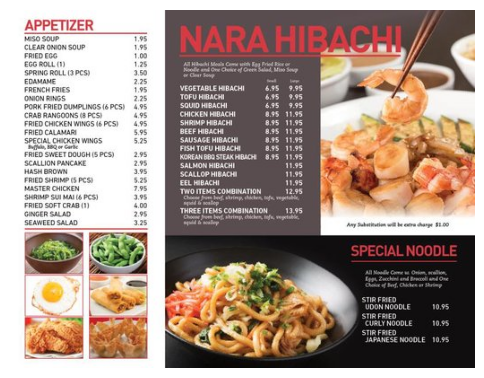

In [125]:
labels = filtered_df['label'].unique()

for label in labels:
    label_data = filtered_df[filtered_df['label'] == label].sample(n=1)
    image_path = label_data['image_path'].values[0]
    print(f"Displaying an image from the label: '{label}' ")
    display_image(image_path)

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def image_preprocessing(labels, img_size=224, label_sample_size=100):
    # Load your dataset
    filtered_df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/csv.csv")  # Update with your dataset path
    
    # Inspect available columns
    print("Columns in dataframe:", filtered_df.columns)
    
    # Construct the image path using the correct column
    base_image_path = 'C:/Users/Dell/OneDrive/Desktop/sem 3/Deep Learning/Assignment-2/photos'
    if 'image_path' not in filtered_df.columns:
        filtered_df['image_path'] = filtered_df['photo_id'].apply(lambda x: os.path.join(base_image_path, f"{x}.jpg"))  # Replace 'photo_id' with the correct column name

    X_train = []
    y_train = []
    for idx, label in enumerate(labels):
        # Filter dataframe for the specific label
        sample_df = filtered_df[filtered_df['label'] == label]
        actual_sample_size = min(len(sample_df), label_sample_size)
        
        if actual_sample_size < label_sample_size:
            print(f"Warning: Not enough data for label '{label}'. Using {actual_sample_size} samples instead of {label_sample_size}.")
        
        sample_df = sample_df.sample(n=actual_sample_size)
        
        for image_path in sample_df['image_path']:
            # Check if the image exists before attempting to load it
            if os.path.exists(image_path):
                try:
                    img = load_img(image_path, target_size=(img_size, img_size))
                    img_array = img_to_array(img)
                    X_train.append(img_array)
                    y_train.append(label)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")
            else:
                print(f"Image file not found: {image_path}")
    
    return np.array(X_train), np.array(y_train)

In [126]:
# Example labels
labels = ['food', 'menu', 'inside', 'outside', 'drink']

X_train, y_train = image_preprocessing(labels)

# Check the shape of the data
print(X_train.shape, y_train.shape)

Columns in dataframe: Index(['photo_id', 'label'], dtype='object')
(500, 224, 224, 3) (500,)


In [127]:
print(X_train.shape, y_train.shape)

(500, 224, 224, 3) (500,)


In [128]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [129]:
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1024).batch(32)

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU


In [145]:
class Generator(tf.keras.Model):
    def __init__(self, z_dim, num_classes):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.num_classes = num_classes

        # Define layers for the generator
        self.fc1 = tf.keras.layers.Dense(128, input_dim=self.z_dim + self.num_classes, activation='relu')
        self.fc2 = tf.keras.layers.Dense(256, activation='relu')
        self.fc3 = tf.keras.layers.Dense(512, activation='relu')
        self.fc4 = tf.keras.layers.Dense(1024, activation='relu')
        self.output_layer = tf.keras.layers.Dense(784, activation='tanh')  # Output 28x28 image

    def call(self, z, labels):
        # Concatenate the noise vector z with labels (condition)
        x = tf.concat([z, labels], axis=-1)  # Concatenate noise and labels along the last dimension
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        generated_image = self.output_layer(x)
        return generated_image


In [146]:
class Discriminator(tf.keras.Model):
    def __init__(self, num_classes):
        super(Discriminator, self).__init__()
        self.num_classes = num_classes

        # Define layers for the discriminator
        self.fc1 = tf.keras.layers.Dense(1024, input_dim=784 + self.num_classes, activation='relu')
        self.fc2 = tf.keras.layers.Dense(512, activation='relu')
        self.fc3 = tf.keras.layers.Dense(256, activation='relu')
        self.fc4 = tf.keras.layers.Dense(128, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # Real or fake

    def call(self, x, labels):
        # Flatten the images (batch_size, 28, 28, 1) -> (batch_size, 28*28)
        x = tf.reshape(x, [-1, 28*28])

        # Concatenate the labels with the flattened image (axis=-1)
        x = tf.concat([x, labels], axis=-1)

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        validity = self.output_layer(x)
        return validity


In [148]:
import tensorflow as tf

# Parameters
latent_dim = 100
num_classes = 5  
g_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
d_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)

# Build models for CGAN
# The generator and discriminator will now accept labels as input

# Create Generator model for CGAN
def create_generator(latent_dim, num_classes):
    model = Generator(latent_dim, num_classes)  # Use your defined Generator class
    return model

# Create Discriminator model for CGAN
def create_discriminator(num_classes):
    model = Discriminator(num_classes)  # Use your defined Discriminator class
    return model

In [149]:


# Create CGAN model
class CGAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(CGAN, self).__init__()
        self.generator_model = generator
        self.discriminator_model = discriminator

    def compile(self, generator_optimizer, discriminator_optimizer):
        super(CGAN, self).compile()
        self.gen_optimizer = generator_optimizer
        self.disc_optimizer = discriminator_optimizer

    def train_step(self, real_images, labels):
        batch_size = tf.shape(real_images)[0]

        # Train the discriminator
        for _ in range(5):
            random_noise = tf.random.normal([batch_size, latent_dim])
            generated_images = self.generator_model(random_noise, labels)

            with tf.GradientTape() as disc_tape:
                real_preds = self.discriminator_model(real_images, labels, training=True)
                fake_preds = self.discriminator_model(generated_images, labels, training=True)

                disc_loss = tf.reduce_mean(fake_preds) - tf.reduce_mean(real_preds)

            disc_gradients = disc_tape.gradient(disc_loss, self.discriminator_model.trainable_variables)
            self.disc_optimizer.apply_gradients(zip(disc_gradients, self.discriminator_model.trainable_variables))

            # Clip discriminator weights (WGAN weight clipping)
            for param in self.discriminator_model.trainable_variables:
                param.assign(tf.clip_by_value(param, -0.01, 0.01))

        # Train the generator
        random_noise = tf.random.normal([batch_size, latent_dim])
        with tf.GradientTape() as gen_tape:
            generated_images = self.generator_model(random_noise, labels)
            fake_preds = self.discriminator_model(generated_images, labels, training=True)

            gen_loss = -tf.reduce_mean(fake_preds)

        gen_gradients = gen_tape.gradient(gen_loss, self.generator_model.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.generator_model.trainable_variables))

        return {'d_loss': disc_loss, 'g_loss': gen_loss}

# Build the models
generator = create_generator(latent_dim, num_classes)
discriminator = create_discriminator(num_classes)

# Create CGAN model
cgan = CGAN(generator, discriminator)
cgan.compile(g_optimizer, d_optimizer)


In [150]:
import tensorflow as tf
import numpy as np

# Example: Assuming images are of shape (num_samples, height, width, channels)
# and labels are of shape (num_samples, num_classes) for one-hot encoded labels
images = np.random.randn(1000, 28, 28, 1)  # Example image data (1000 samples of 28x28x1 images)
labels = np.random.randint(0, 10, size=(1000,))  # Example labels (10 classes)

# Convert labels to one-hot encoding
labels = tf.keras.utils.to_categorical(labels, num_classes=10)

# Create the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((images, labels)).batch(32)  # batch_size=32


In [151]:
import tensorflow as tf
batch_size=128
# Assuming images and labels are numpy arrays or tensors
train_dataset = tf.data.Dataset.from_tensor_slices((images, labels)).batch(batch_size)


In [138]:
# Custom training loop for CGAN
for epoch in range(100):
    print(f"Epoch {epoch + 1}/100")

    for real_images, labels in train_dataset:
        # Perform a single training step with real images and labels
        results = cgan.train_step(real_images, labels)

        # Print losses at each step (optional)
        print(f"d_loss: {results['d_loss']:.4f}, g_loss: {results['g_loss']:.4f}")
        
    print(f"End of epoch {epoch + 1}")


Epoch 1/100
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
d_loss: -0.0000, g_loss: -0.4999
End of epoch 1
Epoch 2/100
d_loss: -0.0001, g_loss: -0.4999
d_loss: -0.0001, g_loss: -0.4999
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
End of epoch 2
Epoch 3/100
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
End of epoch 3
Epoch 4/100
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001, g_loss: -0.4998
d_loss: -0.0001,

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Parameters
latent_dim = 100  
num_images_to_generate = 5  
num_classes = 5  

random_noise = np.random.normal(size=(num_images_to_generate, latent_dim))

random_labels = np.random.randint(0, num_classes, num_images_to_generate) 
random_labels = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes) 

print(f"Random noise shape: {random_noise.shape}")  
print(f"Random labels shape: {random_labels.shape}")  

generated_images = generator.predict([random_noise, random_labels])  # Pass both noise and labels

for i in range(num_images_to_generate):
    plt.imshow((generated_images[i] + 1) / 2)  # Scale images from [-1, 1] to [0, 1] for display
    plt.axis('off')
    plt.show()

Random noise shape: (5, 100)
Random labels shape: (5, 5)


TypeError: missing a required argument: 'labels'